In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts

<bound method IndexOpsMixin.value_counts of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
## independet and dependent feature
X = df.drop('FWI',axis=1)
Y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
## train test split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

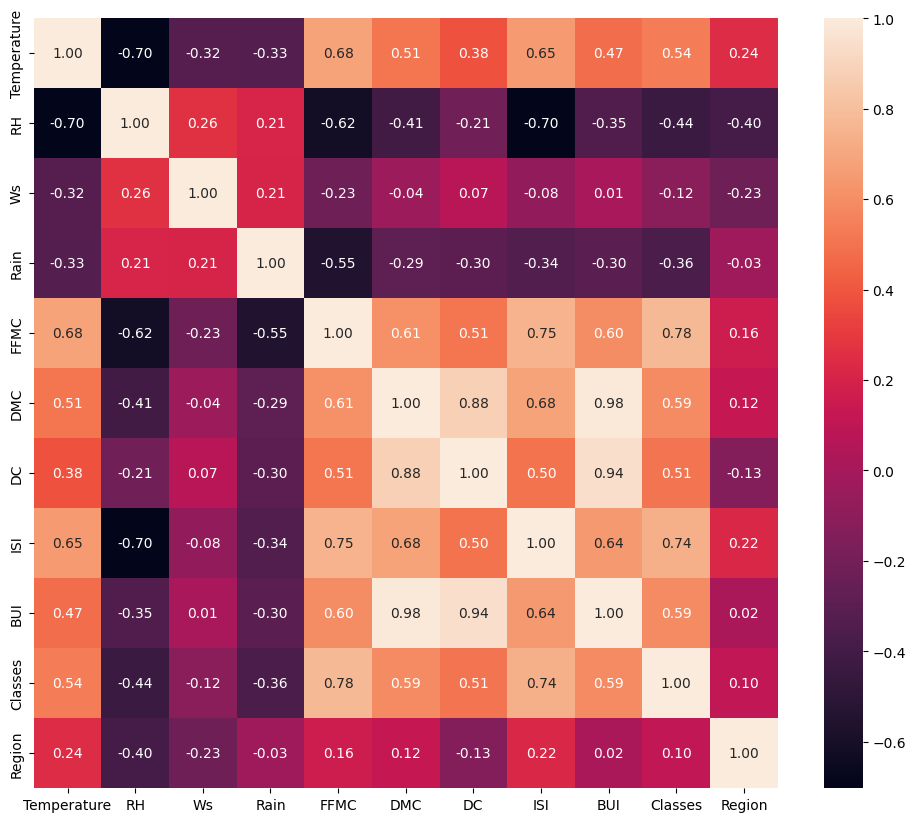

In [16]:
plt.figure(figsize=(12, 10))
correlation = X_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
high_corr_features = correlation(X_train, 0.85)
high_corr_features

{'BUI', 'DC'}

In [19]:
## drop correlation  feature more than 0.85
X_train.drop(high_corr_features,axis=1,inplace=True)
X_test.drop(high_corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

In [20]:
## standerrisazation(feature scalling)
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
X_test_scaled

array([[-3.07399781e-01, -3.26571267e-01, -1.40012858e+00,
        -4.79737153e-01,  6.80856450e-01,  2.05027466e-01,
         1.85488861e-01,  8.91132789e-01, -1.05045146e+00],
       [ 1.34713433e+00, -4.66366686e-01, -2.90935808e-01,
        -4.79737153e-01,  7.92414064e-01,  2.17470875e+00,
         8.16787860e-01,  8.91132789e-01,  9.51971638e-01],
       [ 5.19867277e-01,  7.21894379e-01,  4.48526037e-01,
        -4.79737153e-01,  5.62736623e-01, -9.12254092e-02,
         1.85488861e-01,  8.91132789e-01,  9.51971638e-01],
       [-8.58911153e-01,  3.72405831e-01,  1.55771881e+00,
        -1.52297509e-02, -5.98775004e-01, -6.75724326e-01,
        -7.61459637e-01, -1.12216722e+00, -1.05045146e+00],
       [-5.83155467e-01, -1.16878138e-01, -1.03039765e+00,
         2.69439676e+00, -7.43143681e-01, -7.95826843e-01,
        -8.82863291e-01, -1.12216722e+00,  9.51971638e-01],
       [ 1.89864571e+00, -1.16534378e+00, -1.03039765e+00,
        -4.79737153e-01,  9.36782740e-01,  2.050274

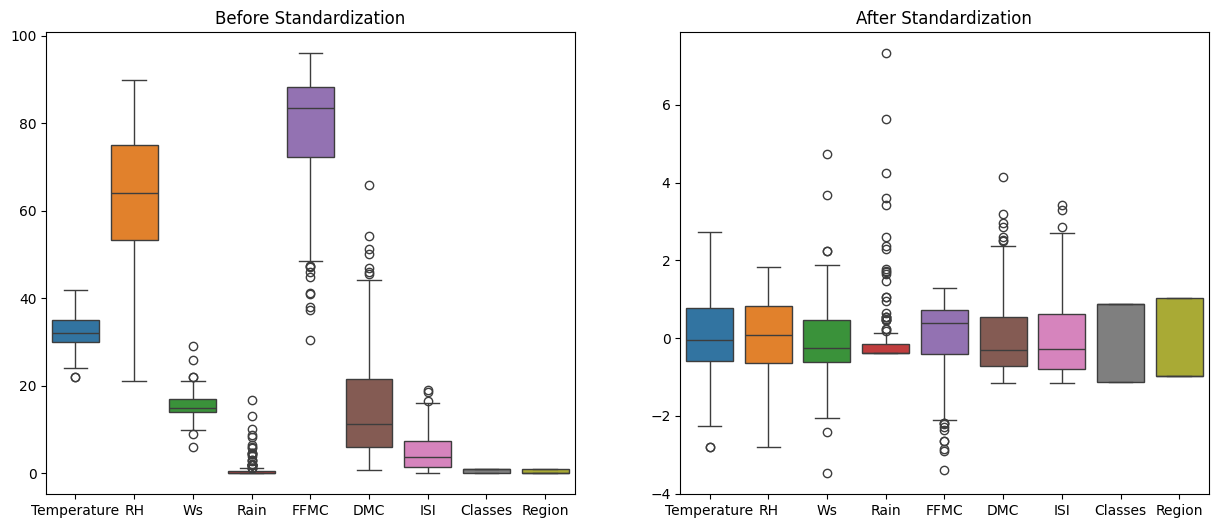

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('Before Standardization')

sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns), ax=axes[1])
axes[1].set_title('After Standardization')

plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [26]:
linreg=LinearRegression()

0.7606529449811249
0.8966307678738921
0.9832091227788919


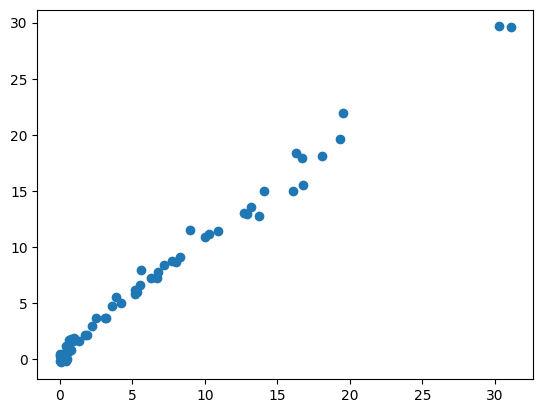

In [27]:
linreg.fit(X_train_scaled,Y_train)
y_pred=linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)

1.4384434478282442
3.158665889863751
0.9321994289773389


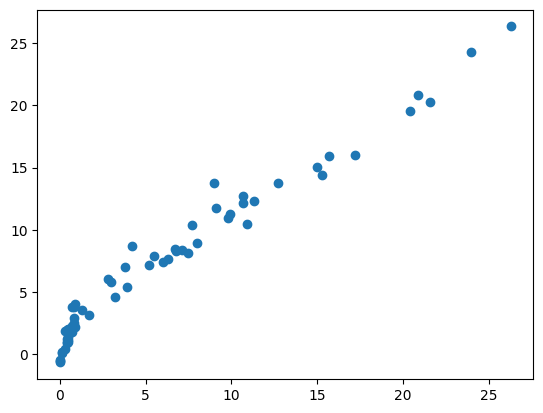

In [47]:
## lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred=lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)


In [29]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [30]:
lassocv.predict(X_test_scaled)

array([ 9.01086507e+00,  1.80720714e+01,  7.37064147e+00,  1.55182053e+00,
       -1.53980372e-03,  1.30285050e+01,  5.53216475e+00, -3.34491539e-01,
        1.75864349e+00,  1.11774769e+01,  8.70755012e+00,  1.14507802e+01,
        2.40973056e+00,  6.45249037e+00,  5.78497110e+00,  2.94138217e+01,
        1.54547301e+01,  1.48335471e+01,  1.01777470e+00,  5.05214978e-01,
        6.34682731e-02,  5.65176766e-01,  1.35301515e+01,  3.31339326e-01,
        7.01636222e+00,  1.04475033e+00,  8.64796141e+00,  1.58384178e+00,
        4.69011866e+00,  1.83875740e+01,  1.78801443e+01,  3.59215012e+00,
        1.08603988e+01,  7.76027296e+00,  1.18749095e-01,  1.28134422e+01,
        2.12529544e+00,  7.83094465e+00,  1.84958478e+00,  1.95298627e+01,
       -2.35235902e-01,  3.12073382e+00, -1.13317393e-01,  1.95501012e+00,
        6.22101866e-01,  2.18158476e+01,  5.04251265e+00,  2.93989353e+01,
        8.31382783e+00, -9.57935392e-02,  6.02369976e+00,  1.28964501e+01,
        1.49685886e+01,  

In [31]:
lassocv.mse_path_


array([[45.50571427, 54.72926654, 52.08413091, 82.1075    , 37.73572568],
       [41.10604224, 49.11324716, 46.22506217, 82.1075    , 33.72117638],
       [37.33567571, 43.0743081 , 40.73777887, 80.35311984, 30.16953793],
       [34.10885638, 37.70191402, 35.77963701, 71.25658113, 26.35773023],
       [31.35125152, 33.02230642, 31.45408734, 62.90627819, 23.05525613],
       [28.99844855, 28.94564962, 27.67943469, 55.59636946, 20.19487081],
       [26.99464692, 25.39373689, 24.38501858, 49.19461479, 17.71800009],
       [24.48266922, 22.29886394, 21.50893673, 43.58555843, 15.57432397],
       [21.60760313, 19.60176985, 18.99742628, 38.6688879 , 13.71954674],
       [19.13850346, 17.2510028 , 16.80367819, 34.35691488, 12.11538631],
       [17.02006079, 15.20178846, 14.88677975, 30.57328321, 10.72859099],
       [15.20371225, 13.41504998, 13.21156697, 27.25142003,  9.53028116],
       [13.65013275, 11.85711696, 11.74695687, 24.3331678 ,  8.4952811 ],
       [12.32247759, 10.49834496, 10.4

0.7852588172115748
0.9320514717479106
0.9825458121819959


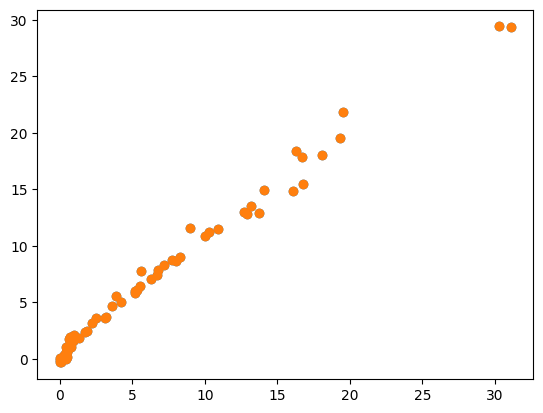

In [34]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)


0.7770054039398011
0.9244800976921246
0.982687598541243


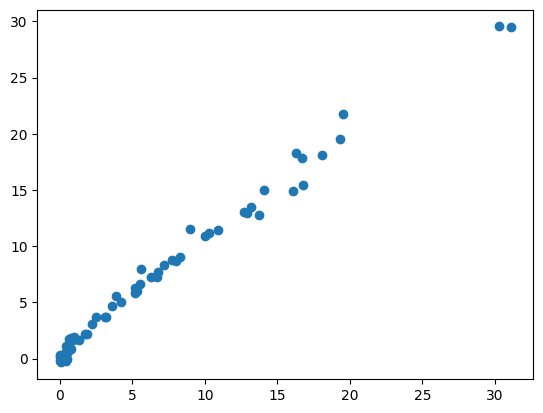

In [36]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)

1.437836840106976
3.3474631293201753
0.9281469077266029


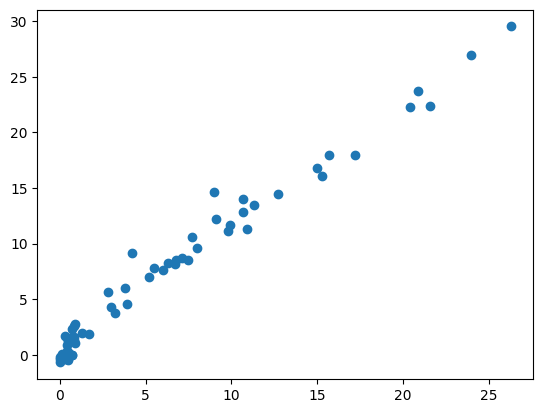

In [48]:
## Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred=ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)

1.9905991303975694
5.124335252889753
0.8900064557722298


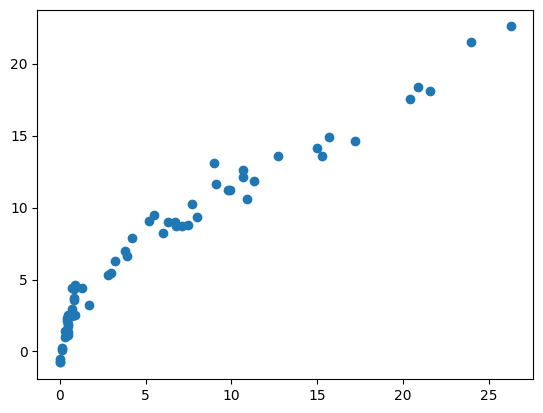

In [49]:
## elsatic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
elsaticnet=ElasticNet()
elsaticnet.fit(X_train_scaled,Y_train)
y_pred=elsaticnet.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)


0.7835281409979828
0.9387355013155606
0.9824206427991976


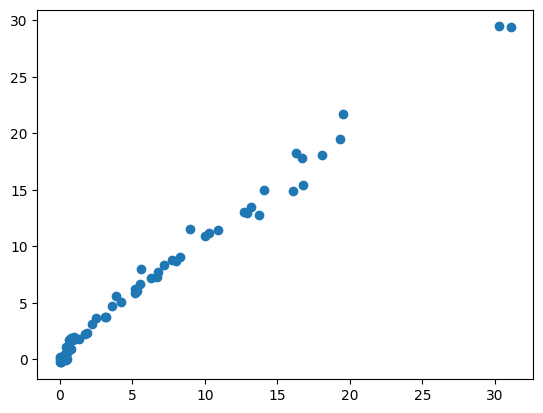

In [37]:
from sklearn.linear_model import ElasticNetCV
ElasticNetcv = ElasticNetCV()
ElasticNetcv.fit(X_train_scaled,Y_train)
y_pred=ElasticNetcv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
score =r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(score)
plt.scatter(Y_test,y_pred)